# Lineal Regression / Boston Prices Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
# The original dataset does not contain a header with the names of the features hence they need to be added
cNames=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing.data',sep='\s+',header=None, names=cNames) #\s+ stands for 1 space or more

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

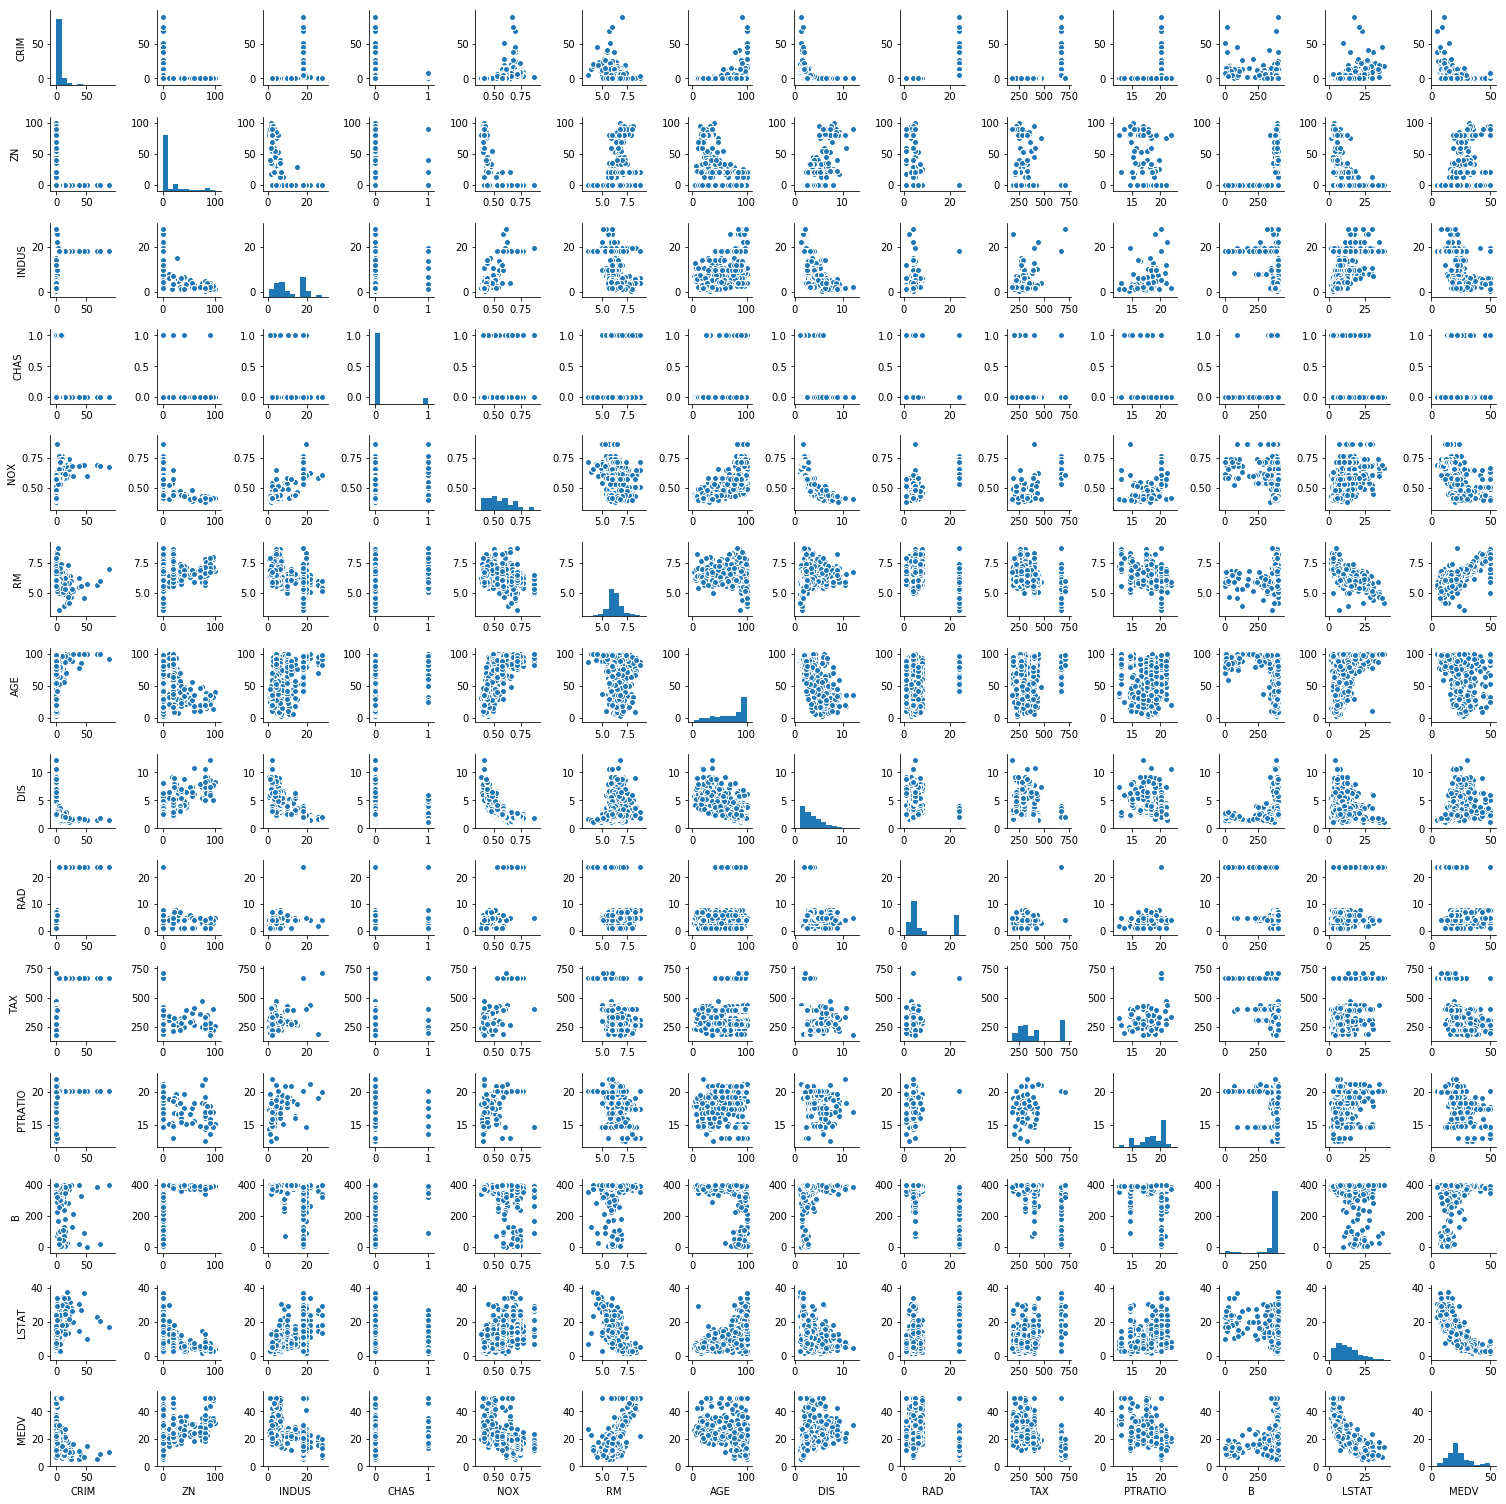

In [6]:
sns.pairplot(data=df,kind='scatter',size=1.5)
plt.show()

## Correlation Analysis and Feature Selection

In [7]:
pd.options.display.float_format='{:,.3f}'.format #formats floats to be visible with 3 decimals in the pandas struct.
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


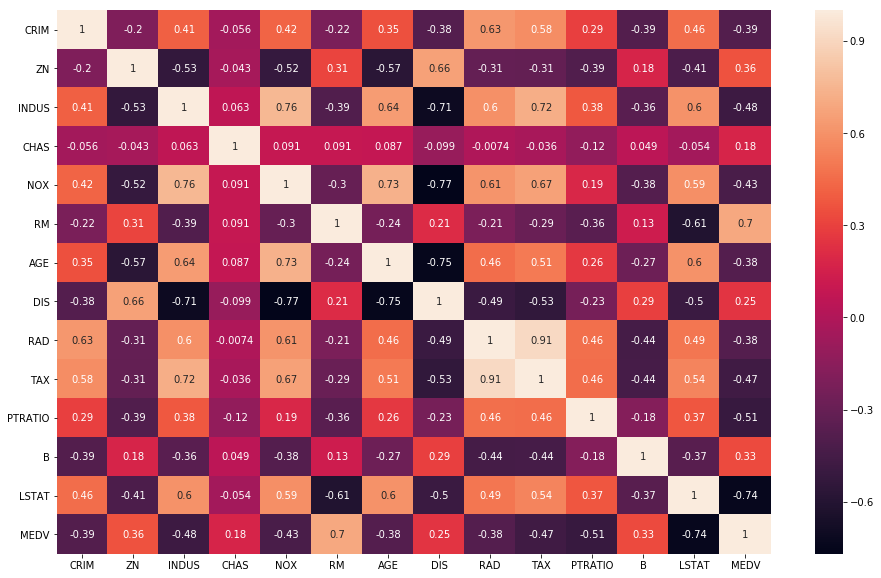

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Single feature Linear Regression _ Rooms per Dweling

We are going to start by doing linear regression by using only 1 feature do try to predict the housing value
Based on the previous correlation analysis, it is clear that 'RM' (Number of Rooms per dweling) has the largest correlation with the MEDV, hence we are going to use this feature

In [9]:
from sklearn.linear_model import LinearRegression as LR

In [10]:
model = LR(fit_intercept=True)

In [11]:
x=df['RM'].values #Single D array
X=x.reshape(-1,1) #1D MAtrix
print(X.shape)
y=df['MEDV'].values
print(y.shape)

(506, 1)
(506,)


In [12]:
model.fit(X=X,y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(model.coef_) #Slope of decission line 'm'
print(model.intercept_) #'b' from the function y=mx+b

[ 9.10210898]
-34.6706207764


## Regression Plot
This seaborn method plots the scattered data and computes the linear regression ploting the decission line.

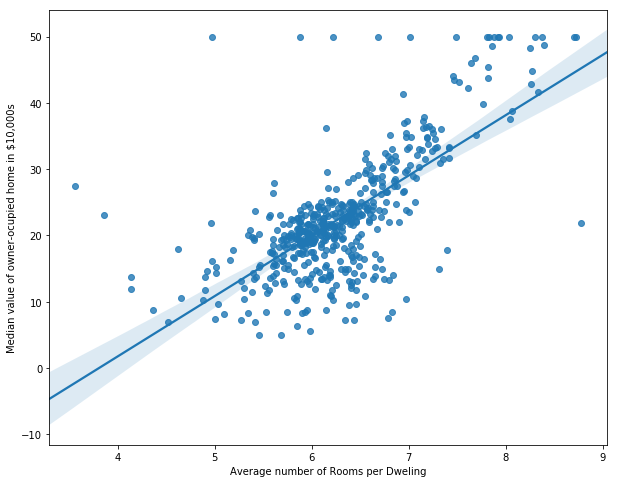

In [14]:
plt.figure(figsize=(10,8));
sns.regplot(x,y);
plt.xlabel('Average number of Rooms per Dweling');
plt.ylabel("Median value of owner-ocupied home in $10,000s");
plt.show();

## Joint Plot
Seaborn embedded plotting method that not only provides a plot which is similar to the regplot, but also provides a histogram and a kernel distribution plot for both the data and the target. This time it uses the original dataframe and you select which columns you want to use as features and target data.

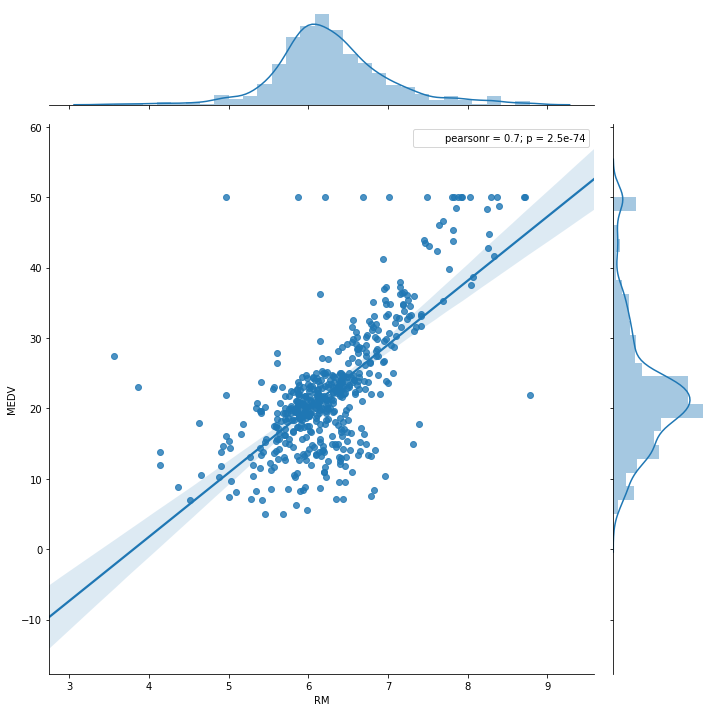

In [15]:
sns.jointplot(data=df,x='RM',y='MEDV', size=10, kind='reg')
plt.show()

# Single feature Linear Regression _ Rooms per Dweling
We will perform the same visual analysis, this time using the LSTAT (Lower status of population) feature since it has a very high impact as well, this time as a negative correlation.

In [16]:
x=df['LSTAT'].values
X=x.reshape(-1,1)
y=df['MEDV'].values #Same as before


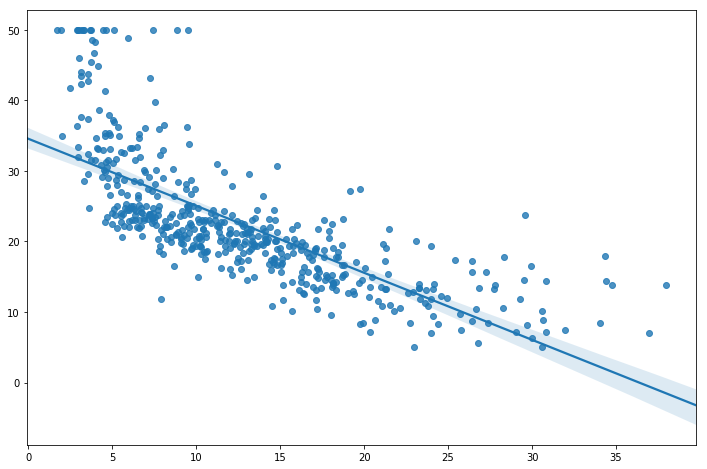

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x=x,y=y)
plt.show()

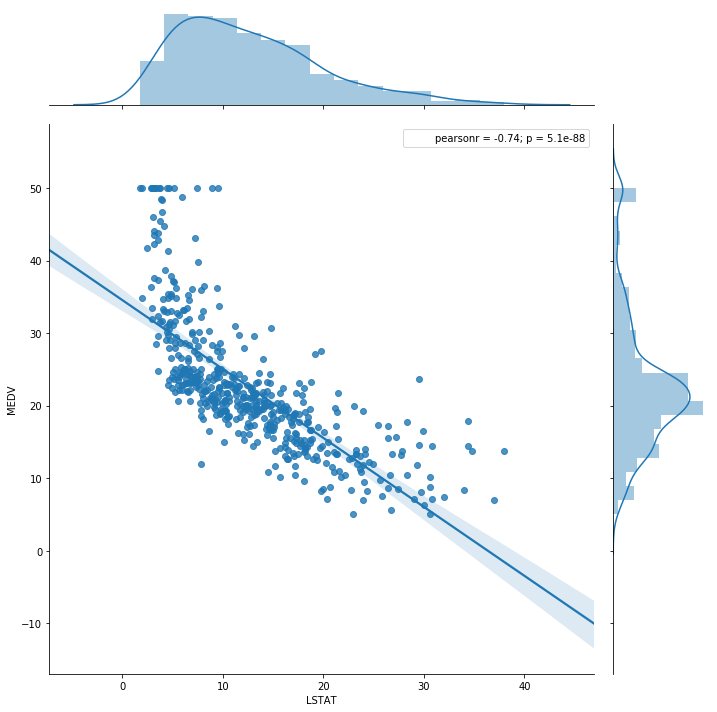

In [18]:
sns.jointplot(data=df,x='LSTAT',y='MEDV',kind='reg', size=10)
plt.show()

As we have seen just by looking at the plots, it is obvious that most/none of the features linearly correlate to the house pricing, as a conclusion we can tell that Lineal Regression is not the best tool for this kind of Analysis.